## Generate paper figures

Inspired by Alex's figure generation script [here](https://github.com/greenelab/generic-expression-patterns/blob/master/figure_generation/figure_generation.py).

In [1]:
import os

from IPython.display import Image, display, SVG
from lxml import etree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import svgutils.transform as sg

import mpmp.config as cfg

In [2]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    """Function to plot individual figure panels."""
    panel = sg.fromfile(filename)

    panel_size = (
        np.round(float(panel.root.attrib["width"][:-2]) * 1.33, 0),
        np.round(float(panel.root.attrib["height"][:-2]) * 1.33, 0),
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)

    return panel

### Figure 1

This is an overview figure that was made in BioRender and assembled into panels using Inkscape, so we won't do anything with it here. Unfortunately BioRender doesn't have an SVG export option, otherwise we could assemble it here.

### Figure 2

original: (948.0, 467.0)
scaled:(805.8, 396.95)
original: (1857.0, 519.0)
scaled:(1299.8999999999999, 363.29999999999995)


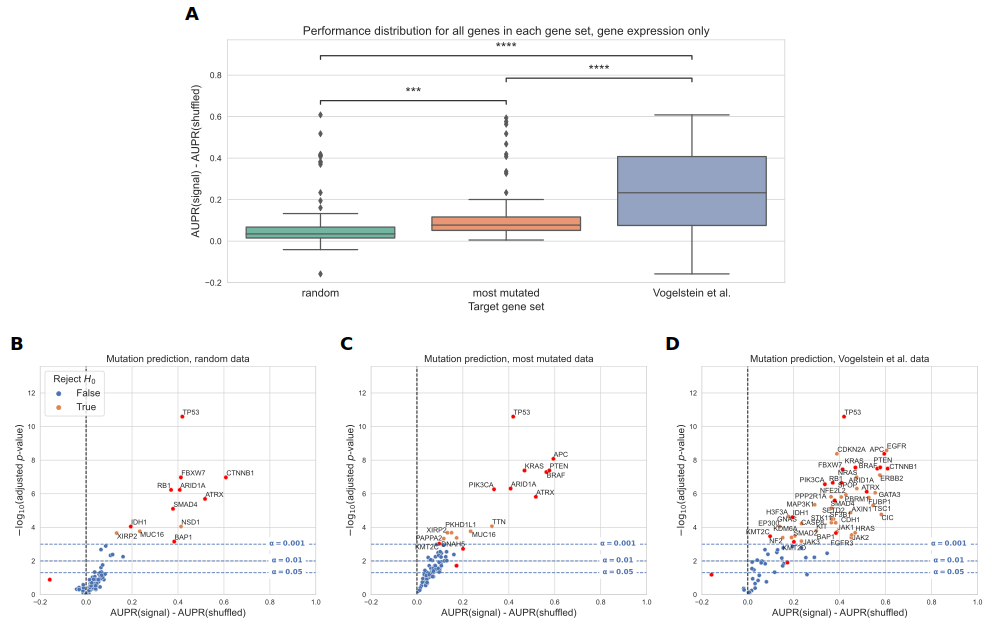

In [3]:
panel_2a = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'expression_boxes.svg'),
    scale_x_input=0.85,
    scale_y_input=0.85,
    x_loc=185,
    y_loc=20,
)

panel_2b = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'expression_vs_shuffled.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=10,
    y_loc=350
)


panel_2a_label = sg.TextElement(185, 20, "A", size=18, weight="bold", font="Verdana")
panel_2b_label = sg.TextElement(10, 350, "B", size=18, weight="bold", font="Verdana")
panel_2c_label = sg.TextElement(340, 350, "C", size=18, weight="bold", font="Verdana")
panel_2d_label = sg.TextElement(665, 350, "D", size=18, weight="bold", font="Verdana")

figure_2 = sg.SVGFigure("995", "635")
figure_2.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_2a,
        panel_2b,
        panel_2a_label,
        panel_2b_label,
        panel_2c_label,
        panel_2d_label,
    ]
)
display(SVG(figure_2.to_str()))

In [4]:
cfg.paper_figures_dir.mkdir(exist_ok=True)

f2_svg = str(cfg.paper_figures_dir / 'figure_2.svg')
f2_png = str(cfg.paper_figures_dir / 'figure_2.png')

figure_2.save(f2_svg)

In [5]:
# use inkscape command line to save as PNG
!inkscape --export-png={f2_png} {f2_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:995:635 exported to 2073 x 1323 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/figure_2.png


### Figure 3

original: (912.0, 664.0)
scaled:(547.1999999999999, 398.4)
original: (1218.0, 541.0)
scaled:(852.5999999999999, 378.7)
original: (1857.0, 519.0)
scaled:(1392.75, 389.25)
original: (1256.0, 519.0)
scaled:(1004.8000000000001, 415.20000000000005)


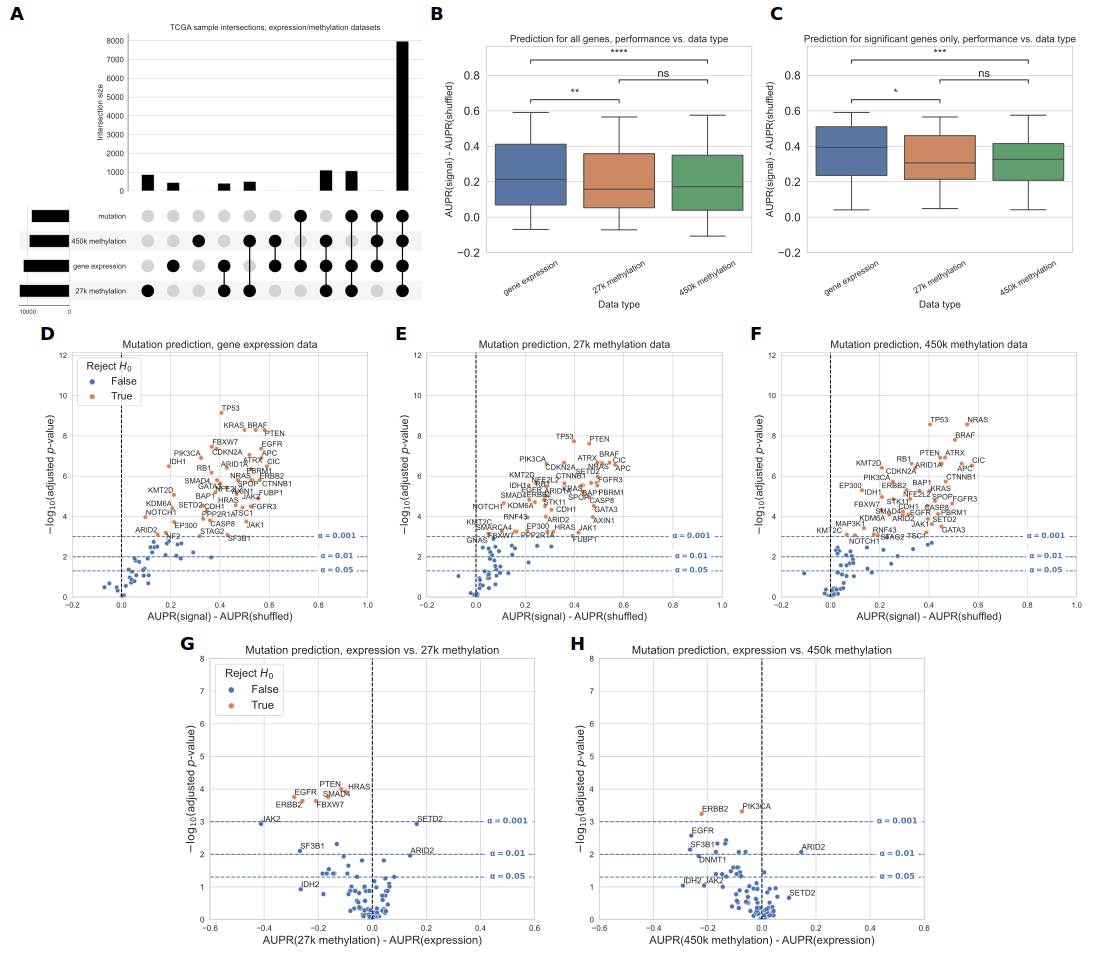

In [6]:
panel_3i = make_figure_panel(
    os.path.join(cfg.images_dirs['data'], 'expression_me_overlap_upset.svg'),
    scale_x_input=0.6,
    scale_y_input=0.6,
    x_loc=15,
    y_loc=20,
)

panel_3ii = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'methylation_best_boxes.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=440,
    y_loc=30,
)

panel_3iii = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'methylation_vs_shuffled.svg'),
    scale_x_input=0.75,
    scale_y_input=0.75,
    x_loc=40,
    y_loc=335
)

panel_3iv = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'methylation_comparison.svg'),
    scale_x_input=0.8,
    scale_y_input=0.8,
    x_loc=180,
    y_loc=640,
)


panel_3a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_3b_label = sg.TextElement(430, 20, "B", size=18, weight="bold", font="Verdana")
panel_3c_label = sg.TextElement(770, 20, "C", size=18, weight="bold", font="Verdana")
panel_3d_label = sg.TextElement(40, 340, "D", size=18, weight="bold", font="Verdana")
panel_3e_label = sg.TextElement(395, 340, "E", size=18, weight="bold", font="Verdana")
panel_3f_label = sg.TextElement(750, 340, "F", size=18, weight="bold", font="Verdana")
panel_3g_label = sg.TextElement(180, 650, "G", size=18, weight="bold", font="Verdana")
panel_3h_label = sg.TextElement(570, 650, "H", size=18, weight="bold", font="Verdana")

figure_3 = sg.SVGFigure("1120", "960")
figure_3.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_3i,
        panel_3ii,
        panel_3iii,
        panel_3iv,
        panel_3a_label,
        panel_3b_label,
        panel_3c_label,
        panel_3d_label,
        panel_3e_label,
        panel_3f_label,
        panel_3g_label,
        panel_3h_label,
    ]
)
display(SVG(figure_3.to_str()))

In [7]:
f3_svg = str(cfg.paper_figures_dir / 'figure_3.svg')
f3_png = str(cfg.paper_figures_dir / 'figure_3.png')

figure_3.save(f3_svg)

In [8]:
!inkscape --export-png={f3_png} {f3_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:1120:960 exported to 2333 x 2000 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/figure_3.png


### Figure 4

original: (2000.0, 946.0)
scaled:(1400.0, 662.1999999999999)


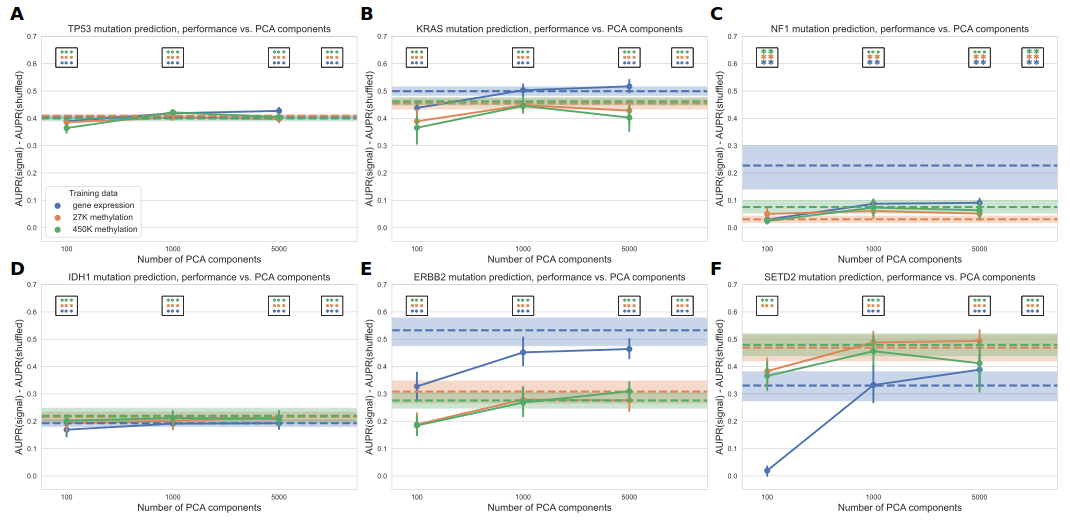

In [9]:
panel_4i = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'methylation_genes.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=10,
    y_loc=20,
)

panel_4a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_4b_label = sg.TextElement(360, 20, "B", size=18, weight="bold", font="Verdana")
panel_4c_label = sg.TextElement(710, 20, "C", size=18, weight="bold", font="Verdana")
panel_4d_label = sg.TextElement(10, 275, "D", size=18, weight="bold", font="Verdana")
panel_4e_label = sg.TextElement(360, 275, "E", size=18, weight="bold", font="Verdana")
panel_4f_label = sg.TextElement(710, 275, "F", size=18, weight="bold", font="Verdana")

figure_4 = sg.SVGFigure("1070", "520")
figure_4.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_4i,
        panel_4a_label,
        panel_4b_label,
        panel_4c_label,
        panel_4d_label,
        panel_4e_label,
        panel_4f_label,
    ]
)
display(SVG(figure_4.to_str()))

In [10]:
f4_svg = str(cfg.paper_figures_dir / 'figure_4.svg')
f4_png = str(cfg.paper_figures_dir / 'figure_4.png')

figure_4.save(f4_svg)

In [11]:
!inkscape --export-png={f4_png} {f4_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:1070:520 exported to 2229 x 1083 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/figure_4.png


### Figure 5

original: (1232.0, 844.0)
scaled:(616.0, 422.0)
original: (1138.0, 851.0)
scaled:(569.0, 425.5)
original: (1709.0, 446.0)
scaled:(1196.3, 312.2)
original: (1692.0, 446.0)
scaled:(1184.3999999999999, 312.2)


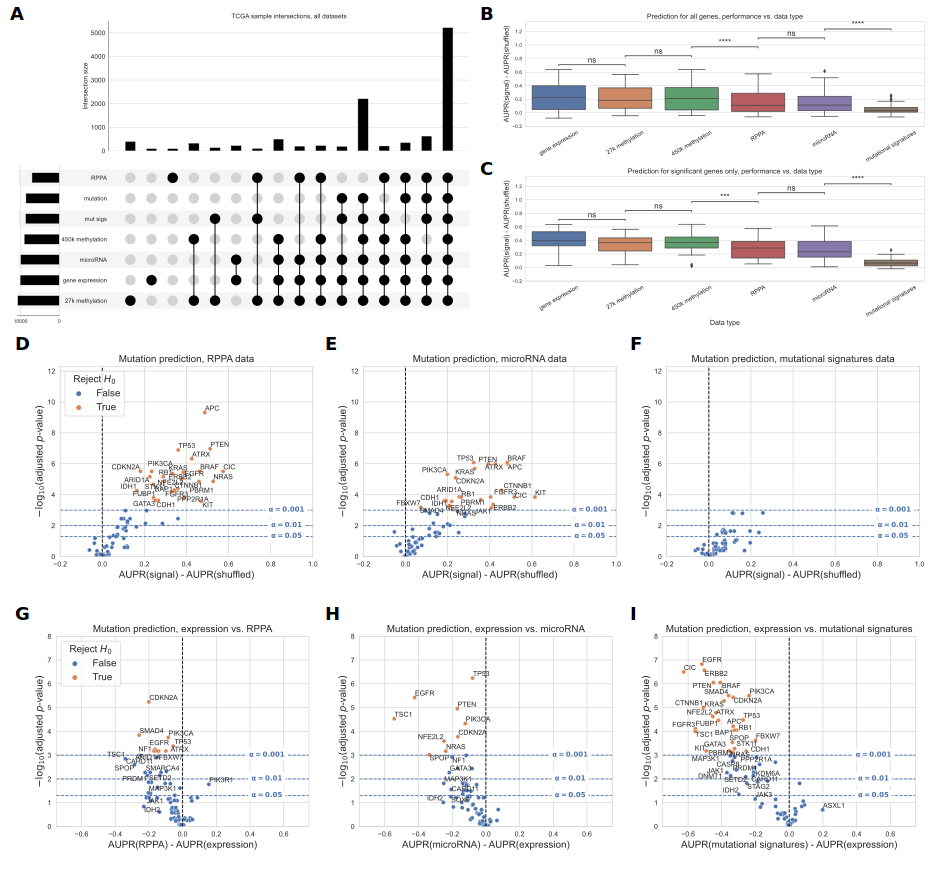

In [12]:
panel_5i = make_figure_panel(
    os.path.join(cfg.images_dirs['data'], 'all_overlap_upset.svg'),
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=10,
    y_loc=10,
)
panel_5ii = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'all_boxes.svg'),
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=500,
    y_loc=10,
)
panel_5iii = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'all_vs_shuffled.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=30,
    y_loc=350
)
panel_5iv = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'all_comparison.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=30,
    y_loc=620,
)

panel_5a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_5b_label = sg.TextElement(480, 20, "B", size=18, weight="bold", font="Verdana")
panel_5c_label = sg.TextElement(480, 175, "C", size=18, weight="bold", font="Verdana")
panel_5d_label = sg.TextElement(15, 350, "D", size=18, weight="bold", font="Verdana")
panel_5e_label = sg.TextElement(325, 350, "E", size=18, weight="bold", font="Verdana")
panel_5f_label = sg.TextElement(630, 350, "F", size=18, weight="bold", font="Verdana")
panel_5g_label = sg.TextElement(15, 620, "G", size=18, weight="bold", font="Verdana")
panel_5h_label = sg.TextElement(325, 620, "H", size=18, weight="bold", font="Verdana")
panel_5i_label = sg.TextElement(630, 620, "I", size=18, weight="bold", font="Verdana")

figure_5 = sg.SVGFigure("940", "870")
figure_5.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_5i,
        panel_5ii,
        panel_5iii,
        panel_5iv,
        panel_5a_label,
        panel_5b_label,
        panel_5c_label,
        panel_5d_label,
        panel_5e_label,
        panel_5f_label,
        panel_5g_label,
        panel_5h_label,
        panel_5i_label,
    ]
)
display(SVG(figure_5.to_str()))

In [13]:
f5_svg = str(cfg.paper_figures_dir / 'figure_5.svg')
f5_png = str(cfg.paper_figures_dir / 'figure_5.png')

figure_5.save(f5_svg)

In [14]:
!inkscape --export-png={f5_png} {f5_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:940:870 exported to 1958 x 1813 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/figure_5.png


### Figure 6

This is a single figure (not multi-panel) generated in `plot_all_results.ipynb`, so we don't have to assemble it here, we can just copy it directly to the `figures` directory.

In [15]:
f6_svg_original = cfg.images_dirs['mutation'] / 'all_heatmap.svg'
f6_png_original = cfg.images_dirs['mutation'] / 'all_heatmap.png'

f6_svg_copy = cfg.paper_figures_dir / 'figure_6.svg'
f6_png_copy = cfg.paper_figures_dir / 'figure_6.png'

f6_svg_copy.write_bytes(f6_svg_original.read_bytes())
f6_png_copy.write_bytes(f6_png_original.read_bytes())

641866

### Figure 7

original: (1033.0, 516.0)
scaled:(960.69, 479.88000000000005)
original: (1906.0, 1139.0)
scaled:(953.0, 569.5)


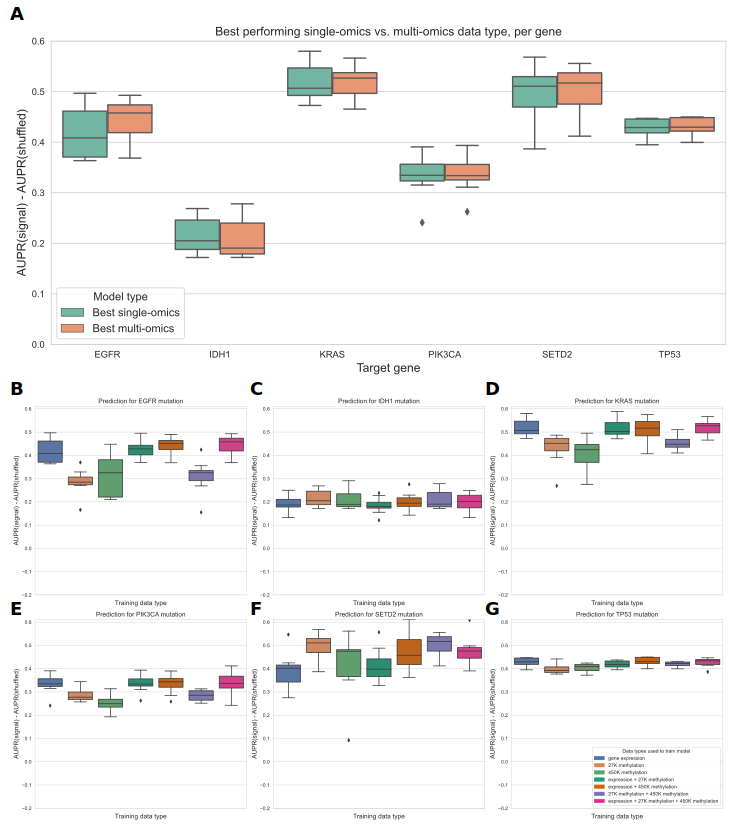

In [16]:
panel_7a = make_figure_panel(
    os.path.join(cfg.images_dirs['multimodal'], 'multi_omics_best_model.svg'),
    scale_x_input=0.93,
    scale_y_input=0.93,
    x_loc=10,
    y_loc=20
)

panel_7b = make_figure_panel(
    os.path.join(cfg.images_dirs['multimodal'], 'multi_omics_boxes.svg'),
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=10,
    y_loc=395,
)

panel_7a_label = sg.TextElement(10, 20, "A", size=18, weight="bold", font="Verdana")
panel_7b_label = sg.TextElement(10, 395, "B", size=18, weight="bold", font="Verdana")
panel_7c_label = sg.TextElement(250, 395, "C", size=18, weight="bold", font="Verdana")
panel_7d_label = sg.TextElement(485, 395, "D", size=18, weight="bold", font="Verdana")
panel_7e_label = sg.TextElement(10, 615, "E", size=18, weight="bold", font="Verdana")
panel_7f_label = sg.TextElement(250, 615, "F", size=18, weight="bold", font="Verdana")
panel_7g_label = sg.TextElement(485, 615, "G", size=18, weight="bold", font="Verdana")

figure_7 = sg.SVGFigure("750", "830")
figure_7.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_7a,
        panel_7b,
        panel_7a_label,
        panel_7b_label,
        panel_7c_label,
        panel_7d_label,
        panel_7e_label,
        panel_7f_label,
        panel_7g_label,
    ]
)
display(SVG(figure_7.to_str()))

In [17]:
f7_svg = str(cfg.paper_figures_dir / 'figure_7.svg')
f7_png = str(cfg.paper_figures_dir / 'figure_7.png')

figure_7.save(f7_svg)

In [18]:
!inkscape --export-png={f7_png} {f7_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:750:830 exported to 1563 x 1729 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/figure_7.png


### Supplementary Figure 3

Supp. Figures 1 and 2 are single-panel and don't need to be assembled here.

original: (1709.0, 446.0)
scaled:(1196.3, 312.2)
original: (1247.0, 446.0)
scaled:(997.6, 356.8)


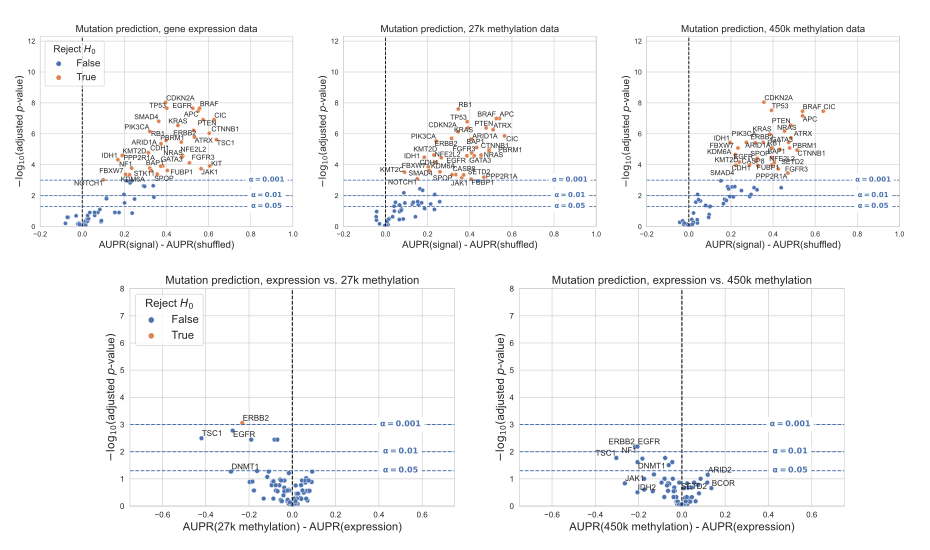

In [19]:
panel_s3a = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'all_vs_shuffled_extended.svg'),
    scale_x_input=0.7,
    scale_y_input=0.7,
    x_loc=10,
    y_loc=20
)

panel_s3b = make_figure_panel(
    os.path.join(cfg.images_dirs['mutation'], 'all_comparison_extended.svg'),
    scale_x_input=0.8,
    scale_y_input=0.8,
    x_loc=100,
    y_loc=270,
)

figure_s3 = sg.SVGFigure("930", "550")
figure_s3.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_s3a,
        panel_s3b,
    ]
)
display(SVG(figure_s3.to_str()))

In [20]:
s3_svg = str(cfg.paper_figures_dir / 'supp_figure_3.svg')
s3_png = str(cfg.paper_figures_dir / 'supp_figure_3.png')

figure_s3.save(s3_svg)

In [21]:
!inkscape --export-png={s3_png} {s3_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:930:550 exported to 1938 x 1146 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/supp_figure_3.png


### Supplementary Figure 4

original: (1033.0, 516.0)
scaled:(960.69, 479.88000000000005)
original: (1906.0, 1139.0)
scaled:(953.0, 569.5)


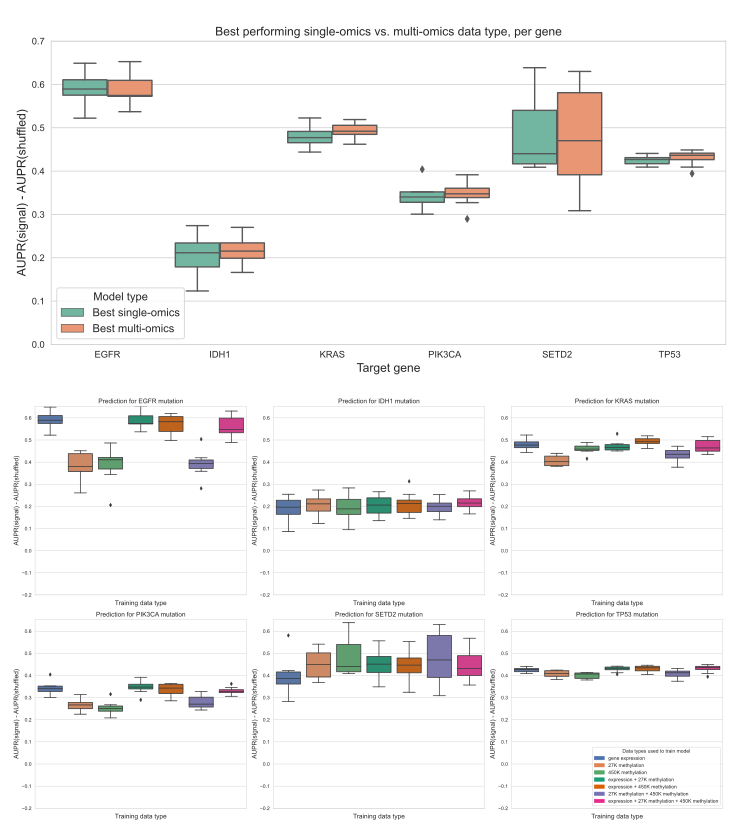

In [22]:
panel_s4a = make_figure_panel(
    os.path.join(cfg.images_dirs['multimodal'], 'multi_omics_best_model_raw_feats.svg'),
    scale_x_input=0.93,
    scale_y_input=0.93,
    x_loc=10,
    y_loc=20
)

panel_s4b = make_figure_panel(
    os.path.join(cfg.images_dirs['multimodal'], 'multi_omics_boxes_raw_feats.svg'),
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=10,
    y_loc=395,
)

figure_s4 = sg.SVGFigure("750", "830")
figure_s4.append(
    [
        etree.Element("rect", {"width": "100%", "height": "100%", "fill": "white"}),
        panel_s4a,
        panel_s4b,
    ]
)
display(SVG(figure_s4.to_str()))

In [23]:
s4_svg = str(cfg.paper_figures_dir / 'supp_figure_4.svg')
s4_png = str(cfg.paper_figures_dir / 'supp_figure_4.png')

figure_s4.save(s4_svg)

In [24]:
!inkscape --export-png={s4_png} {s4_svg} -d 200

DPI: 200
Background RRGGBBAA: ffffff00
Area 0:0:750:830 exported to 1563 x 1729 pixels (200 dpi)
Bitmap saved as: /home/jake/research/mpmp/figures/supp_figure_4.png
